<a href="https://colab.research.google.com/github/Koitoresu/Micro-Credential-Winter-2022/blob/main/CodeLab/WeekThree/Advertising_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

# Importing the Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,0,2016-06-03 21:43:21,1


In [ ]:
df2 = df.drop(['Timestamp'], 1)

In [ ]:
df2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


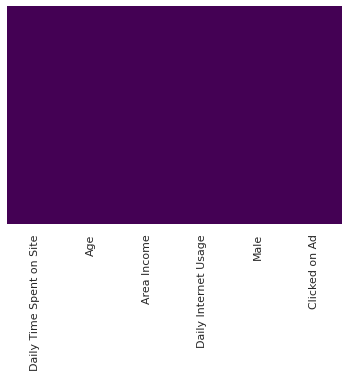

In [ ]:
sns.heatmap(df2.isnull(), yticklabels=False,cbar=False,cmap='viridis')

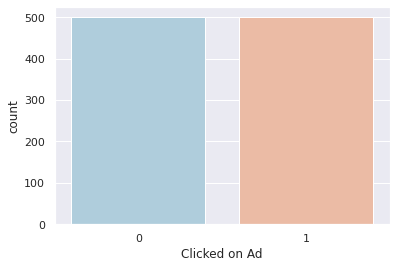

In [ ]:
sns.countplot(x='Clicked on Ad', data=df2, palette='RdBu_r')

# Confusion Matrix

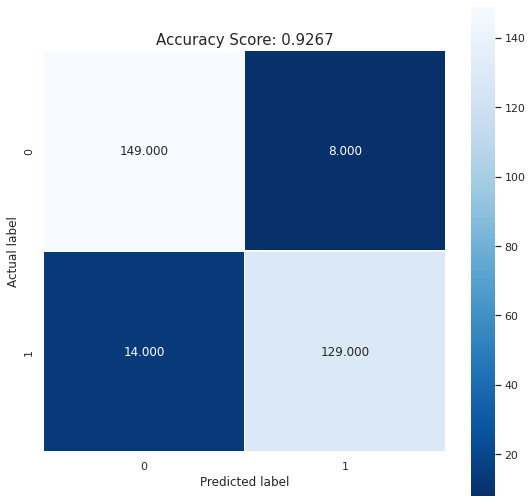

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# Creates a confusion matrix after comparing the actual y_test values against the predict values (aka Y_test_predict)
# The rest is formating for visualization purposes.
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logmodel.score(X_test, y_test),4))
plt.title(all_sample_title, size = 15);

# Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_df2, X_test, y_df2, y_test = train_test_split(df2.drop('Clicked on Ad',axis=1), 
                                                    df2['Clicked on Ad'], test_size=0.30,
                                                random_state=101)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_df2,y_df2)

LogisticRegression()

# Testing the Model

In [ ]:
predictions = logmodel.predict(X_test)

# Evaluating the model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Printing evaluation and prediction reports

In [ ]:
# Prints the mean accuracy on the given test data and levels (approximately 92.66%)
print("Accuracy of", round((logmodel.score(X_test,y_test)*100),2),"%")

# Assigns the predicted y test values after using the X_test values
y_test_predict = logmodel.predict(X_test)

print("In this scenario:")
print(sum(y_test_predict!=0), "people clicked on an ad.")
print(sum(y_test_predict==0), "people did not click on an ad.")

Accuracy of 92.67 %
In this scenario:
137 people clicked on an ad.
163 people did not click on an ad.


# Different Test Sizes, Different Results

In [ ]:
X_df2, X_test, y_df2, y_test = train_test_split(df2.drop('Clicked on Ad',axis=1), 
                                                    df2['Clicked on Ad'], test_size=0.20,
                                                random_state=101)

In [ ]:
# Prints the mean accuracy on the given test data and levels (approximately 92.66%)
print("Accuracy of", round((logmodel.score(X_test,y_test)*100),2),"%")

# Assigns the predicted y test values after using the X_test values
y_test_predict = logmodel.predict(X_test)

print("In this scenario:")
print(sum(y_test_predict!=0), "people clicked on an ad.")
print(sum(y_test_predict==0), "people did not click on an ad.")

Accuracy of 92.0 %
In this scenario:
91 people clicked on an ad.
109 people did not click on an ad.


In [ ]:
X_df2, X_test, y_df2, y_test = train_test_split(df2.drop('Clicked on Ad',axis=1), 
                                                    df2['Clicked on Ad'], test_size=0.40,
                                                random_state=101)

In [ ]:
# Prints the mean accuracy on the given test data and levels (approximately 92.66%)
print("Accuracy of", round((logmodel.score(X_test,y_test)*100),2),"%")

# Assigns the predicted y test values after using the X_test values
y_test_predict = logmodel.predict(X_test)

print("In this scenario:")
print(sum(y_test_predict!=0), "people clicked on an ad.")
print(sum(y_test_predict==0), "people did not click on an ad.")

Accuracy of 91.25 %
In this scenario:
187 people clicked on an ad.
213 people did not click on an ad.
